<a href="https://colab.research.google.com/github/huanminh1612/ShopCustomerData/blob/main/Shop_Customer_Data_Personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Shop Customer Data - Dữ liệu khách hàng của cửa hàng](https://www.kaggle.com/datasets/datascientistanna/customers-dataset)
# **1.Thông tin tập dữ liệu**
- Loại bài toán: **Bài toán phân loại (classification)**
- Kích thước dữ liệu: 2000 dòng
- Chiều của dữ liệu: 7 cột
- Dữ liệu đầu vào: Một tập dữ liệu Shop Customer Data Set đã được kiểm tra tính đầy đủ và độ chính xác
- Kết quả đầu ra: Một tập dữ liệu đã được xử lý, phân tích và khai thác để đưa ra những kết luận

**Thông tin tập dữ liệu thông tin các khách hàng đã mua hàng:**
  + Cột 1: Gender of a customer - **Giới tính**
  + Cột 2: Age - **Độ tuổi**
  + Cột 3: Annual income of a customer - **Thu nhập mỗi năm**
  + Cột 4: Score - **Điểm thành viên**
  + Cột 5: Profession of a customer - **Nghề nghiệp** 
  + Cột 6: Work Experience - **Kinh nghiệm làm việc**
  + Cột 7: Family Size - **Số người trong gia đình**
  

**Thông tin thuộc tính:**
+ **Gender**: Giới tính của một khách hàng
+ **Age**: Tuổi của một khách hàng
+ **Annual Income**: Thu nhập hàng năm của một khách hàng
+ **Score**: Điểm chi tiêu/ thành viên ở cửa hàng dựa trên nhu cầu mua sắm của từng khách hàng
+ **Profession**: Nghiệp vụ của khách hàng đó
+ **Work Experience**: Kinh nghiệm làm viẹc của khách hàng (được tính dựa trên số năm)
+ **Family Size**: Số lượng thành viên có trong gia đình của khách hàng đó

---
# **Chuẩn bị tập dữ liệu**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from pylab import rcParams
import seaborn as sns
%matplotlib inline
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set_style('whitegrid')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  LabelEncoder

Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Đọc dữ liệu từ file **Customers.data**, Với các chỉ định của file đọc vào:
- encoding: mặc định là utf-8
- sep: dấu ngăn cách giữa các cột. Mặc định là dấu phẩy (‘,’)
- header: có header(tiêu đề của các cột)

Lúc này:
data sẽ là một đối tượng có hàng, cột gọi là DataFrame.

In [ ]:
# đọc file dữ liệu
data = pd.read_csv('/content/drive/MyDrive/KPDL/GK/Customers.csv')
#data.head()
data.head()

,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


**Kích thước của data**
- Phần đầu tiên thể hiện số dòng của dữ liệu
- Phần thứ hai thể hiện số cột của dữ liệu

In [ ]:
data.shape

(2000, 7)

**Xem thông tin của data**

Thông tin về Index, kiểu dữ liệu và dung lượng của DataFrame

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          2000 non-null   object
 1   Age             2000 non-null   int64 
 2   AnnualIncome    2000 non-null   int64 
 3   Score           2000 non-null   int64 
 4   Profession      1981 non-null   object
 5   WorkExperience  2000 non-null   int64 
 6   FamilySize      2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 109.5+ KB


---
# **2. Phân tích dữ liệu khám phá**
  
**`2.1. Tiền xử lý dữ liệu`**

**Xác định và xử lý các dữ liệu bị thiếu**

In [ ]:
# Xác định các dữ liệu bị thiếu
data.isnull()

,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False


In [ ]:
# Đếm các dữ liệu thiếu trong từng cột
data.isnull().sum()

Gender             0
Age                0
AnnualIncome       0
Score              0
Profession        19
WorkExperience     0
FamilySize         0
dtype: int64

In [ ]:
# Tính giá trị % dữ liệu bị thiếu trong cột
data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]

Profession    0.95
dtype: float64

***Xem xét dữ liệu có nên bị xóa hay thay thế:***
- nếu dữ liệu bị null nhỏ hơn 10% trong bảng dữ liệu của chúng ta, ta có thể xóa nó
- nếu lớn hơn 10%, ta dùng phương pháp thay thế dữ liệu thiếu.
Tập dử liệu này không có dữ liệu bị thiếu


> Ở đây dữ liệu nhỏ hơn 10% nên chúng ta có thể xóa nó và nó không ảnh hưởng nhiều đến dữ liệu

In [ ]:
# Loại bỏ các dữ liệu bị thiếu
data.dropna(inplace=True)
data

,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1995,Female,71,184387,40,Artist,8,7
1996,Female,91,73158,32,Doctor,7,7
1997,Male,87,90961,14,Healthcare,9,2
1998,Male,77,182109,4,Executive,7,2


**Xác định và xử lý các bộ giá trị trùng lặp trong data.**

Theo mặc định, đối với mỗi bộ giá trị trùng lặp, lần xuất hiện đầu tiên được đặt thành False và tất cả các giá trị khác thành True

In [ ]:
#Xác định bộ giá trị trùng lặp
data.duplicated() 

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 1981, dtype: bool

In [ ]:
print("Số lượng dữ liệu trùng lặp", len(data[data.duplicated()]))
data[data.duplicated()]

Số lượng dữ liệu trùng lặp 2


,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize
21,Male,67,7000,14,Engineer,1,3
514,Male,0,173743,96,Artist,0,4


**Loại bỏ các dữ liệu trùng lặp không cần thiết**

In [ ]:
print("Kích thước của Data trước khi xóa các hàng trùng lặp", data.shape)
data = data.drop_duplicates()
data.index = range(len(data))
print("Kích thước của Data sau khi xóa các hàng trùng lặp", data.shape)

Kích thước của Data trước khi xóa các hàng trùng lặp (1981, 7)
Kích thước của Data sau khi xóa các hàng trùng lặp (1979, 7)


**Xác định và Xử lý dữ liệu ngoại lai Outliers**

Phát hiện outliers

***Xác định và xử lý outliers của thuộc tính Age***

In [ ]:
#ngưỡng dưới, ngưỡng trên của biến Tuổi Age
min_threshold, max_threshold = data.Age.quantile([0.01, 0.99])
min_threshold, max_threshold

(0.0, 98.0)

In [ ]:
#tập dữ liệu trên max_threshold -> outliers
data[data['Age']>max_threshold]

,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize
343,Female,99,184426,41,Artist,9,1
347,Male,99,173394,4,Engineer,13,1
357,Male,99,63364,61,Entertainment,1,2
538,Male,99,164781,83,Engineer,0,2
559,Female,99,172896,13,Engineer,0,3
924,Female,99,56851,72,Entertainment,6,3
1003,Female,99,55972,83,Entertainment,1,7
1006,Female,99,145777,94,Executive,1,5
1089,Female,99,103706,50,Entertainment,1,2
1119,Female,99,57677,99,Lawyer,0,5


In [ ]:
#tập dữ liệu dưới min_threshold -> outliers
data[data['Age']<min_threshold]

,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize


In [ ]:
#xóa outliers
data = data[(data['Age']<max_threshold)&(data['Age']>min_threshold)]
data

,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1974,Female,71,184387,40,Artist,8,7
1975,Female,91,73158,32,Doctor,7,7
1976,Male,87,90961,14,Healthcare,9,2
1977,Male,77,182109,4,Executive,7,2


***Xác định và xử lý outliers của thuộc tính Annual Income***

In [ ]:
#Thu nhập hàng năm - Annual Income
AnnualIncome_min_threshold, AnnualIncome_max_threshold = data.AnnualIncome.quantile([0.01, 0.99])
#AnnualIncome_min_threshold= data['AnnualIncome'].min()
#AnnualIncome_max_threshold= data['AnnualIncome'].max()
data = data[(data['AnnualIncome']<AnnualIncome_max_threshold)&(data['AnnualIncome']>AnnualIncome_min_threshold)]

***Xác định và xử lý outliers của thuộc tính Score***

In [ ]:
#Điểm thành viên - Score
Score_min_threshold, Score_max_threshold = data.Score.quantile([0.01, 0.99])
data = data[(data['Score']<Score_max_threshold)&(data['Score']>Score_min_threshold)]

***Xác định và xử lý outliers của thuộc tính Work Experience***

In [ ]:
#Kinh nghiệm làm việc - Work Experience
WorkExperience_min_threshold, WorkExperience_max_threshold = data.WorkExperience.quantile([0.01, 0.99])
data = data[(data['WorkExperience']<WorkExperience_max_threshold)&(data['WorkExperience']>WorkExperience_min_threshold)]

***Xác định và xử lý outliers của thuộc tính Family Size***

In [ ]:
#Tổng thành viên trong gia đình - Family Size
FamilySize_min_threshold, FamilySize_max_threshold = data.FamilySize.quantile([0.01, 0.99])
data = data[(data['FamilySize']<FamilySize_max_threshold)&(data['FamilySize']>FamilySize_min_threshold)]

***Kích thước của tập dữ liệu sau khi đã xử lý outliers***

In [ ]:
data.shape

(1041, 7)

**Xác đinh và xử lý dữ liệu nhiễu**

In [ ]:
#Xác đinh dữ liệu nhiễu
Noisy_data = data[( (data['Age'] < 0) | (data['AnnualIncome'] < 0) | (data['Score'] < 0) | (data['WorkExperience'] < 0) | (data['FamilySize'] < 0 ) )]
Noisy_data

,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize


In [ ]:
#Xử lý dữ liệu nhiễu
data = data[(data['Age'] > 0 ) & (data['AnnualIncome'] > 0) & (data['Score'] > 0) & (data['WorkExperience'] > 0) & (data['FamilySize'] > 0)]
data.shape

(1041, 7)

**Xuất tập dữ liệu**

In [ ]:
#Xuất tập dữ liệu
data.to_csv('/content/drive/MyDrive/KPDL/GK/Output.csv', index=False)

**2.2. Khám phá dữ liệu**

  **2.2.1.** Phân tích thống kê mô tả



**Giá trị trung bình**

In [ ]:
#Giá trị trung bình làm tròn đến 0.1
mean=data.mean().round(1)
print(mean)

Age                   49.0
AnnualIncome      111843.9
Score                 51.1
WorkExperience         5.1
FamilySize             3.8
dtype: float64


<ipython-input-27-e4b616b5c03f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean=data.mean().round(1)


**Giá trị trung vị**

In [ ]:
#Gia trị trung vị làm tròn đến 0.1
median=data.median().round(1)
print(median)

Age                   47.0
AnnualIncome      110870.0
Score                 50.0
WorkExperience         5.0
FamilySize             4.0
dtype: float64


<ipython-input-28-af69670f2b81>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median=data.median().round(1)


**Độ lệch chuẩn**

In [ ]:
#Độ lệch chuẩn làm tròn đến 0.1
std=data.std().round(1)
print(std)

Age                  27.7
AnnualIncome      44632.8
Score                27.1
WorkExperience        3.5
FamilySize            1.4
dtype: float64


<ipython-input-29-3847535c3bc6>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std=data.std().round(1)


**Phân vị**

In [ ]:
#Giá trị phân vị làm tròn đến 0.1
describe=data.describe().round(1)
print(describe)

          Age  AnnualIncome   Score  WorkExperience  FamilySize
count  1041.0        1041.0  1041.0          1041.0      1041.0
mean     49.0      111843.9    51.1             5.1         3.8
std      27.7       44632.8    27.1             3.5         1.4
min       1.0        9000.0     2.0             1.0         2.0
25%      26.0       76000.0    30.0             1.0         3.0
50%      47.0      110870.0    50.0             5.0         4.0
75%      73.0      150174.0    75.0             8.0         5.0
max      97.0      187898.0    98.0            14.0         6.0


**2.2.2.** Phân tích đơn biến


**Xem xét phân bố của từng biến trong dữ liệu bằng cách sử dụng histogram.**

**Gender (Giới tính)**

In [ ]:
print(data['Gender'].value_counts())

Female    621
Male      420
Name: Gender, dtype: int64


Tính tỉ lệ phần trăm giữa 2 giới tính

Phần trăm Male: 40.3
Phần trăm Famale: 59.7


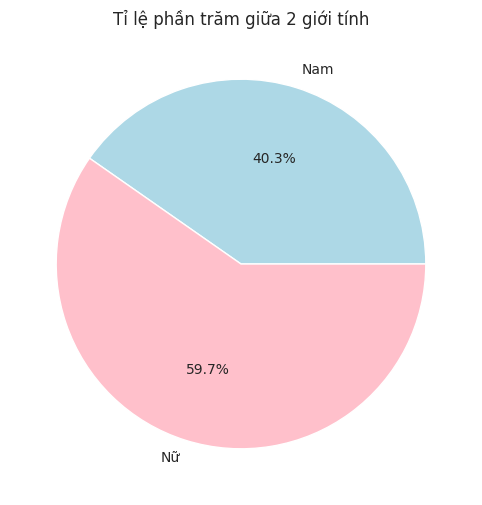

In [ ]:
# Đếm số lượng giá trị unique của mỗi nhóm
value_counts = data['Gender'].value_counts()

# Tính tỉ lệ phần trăm giữa hai giá trị
male_percentage = value_counts['Male'] / len(data) * 100
female_percentage = value_counts['Female'] / len(data) * 100

print("Phần trăm Male:", male_percentage.round(1))
print("Phần trăm Famale:", female_percentage.round(1))

# Dữ liệu tỉ lệ phần trăm giữa 2 giới tính
gender_percentage = [male_percentage.round(1), female_percentage.round(1)]  # [nam, nữ]

# Tên nhãn cho biểu đồ
labels = ['Nam', 'Nữ']

# Màu sắc cho các miền trong biểu đồ
colors = ['lightblue', 'pink']

# Vẽ biểu đồ đồ họa tròn
plt.pie(gender_percentage, labels=labels, colors=colors, autopct='%1.1f%%')

# Đặt tiêu đề cho biểu đồ
plt.title("Tỉ lệ phần trăm giữa 2 giới tính")

# Hiển thị biểu đồ
plt.show()

**Age (Tuổi)**

In [ ]:
print(data['Age'].value_counts())

38    18
32    17
34    16
54    16
97    16
      ..
82     5
56     5
51     5
57     4
61     4
Name: Age, Length: 97, dtype: int64


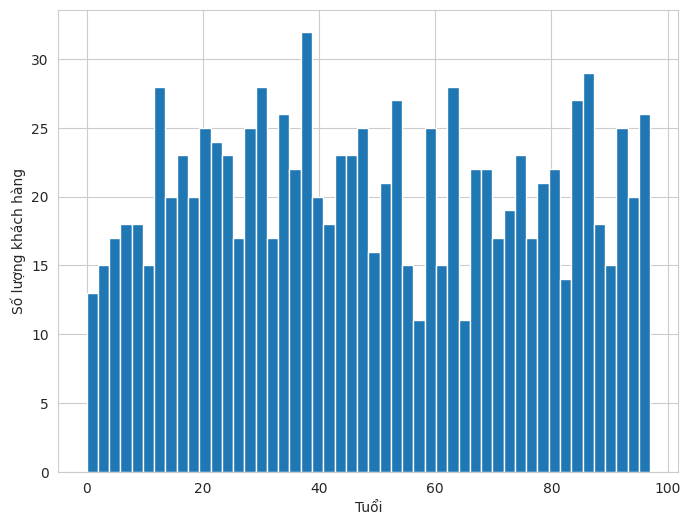

In [ ]:
maxAge = data['Age'].max()
minAge = data['Age'].min()
plt.hist(data['Age'], bins=50, range=(minAge-1, maxAge))
# Đặt tên cho trục x và trục y
plt.xlabel('Tuổi')
plt.ylabel('Số lượng khách hàng')
plt.show()

- Trục x: là số tuổi (Tuổi)
- Trục y: là số lượng khách hàng (Người)

**Nhận xét:**
- Trong khoảng độ tuổi từ 34-36 tuổi là là độ tuổi khách hàng nhiều nhất
- Trong khoảng từ 70 tuổi trở đi khách hàng ít có nhu cầu mua hàng hơn


**Annual Income (Thu nhập hàng năm)**


In [ ]:
print(data['AnnualIncome'].value_counts())

31000     6
85000     5
50000     5
89000     4
9000      4
         ..
78971     1
65528     1
130573    1
152303    1
110610    1
Name: AnnualIncome, Length: 951, dtype: int64


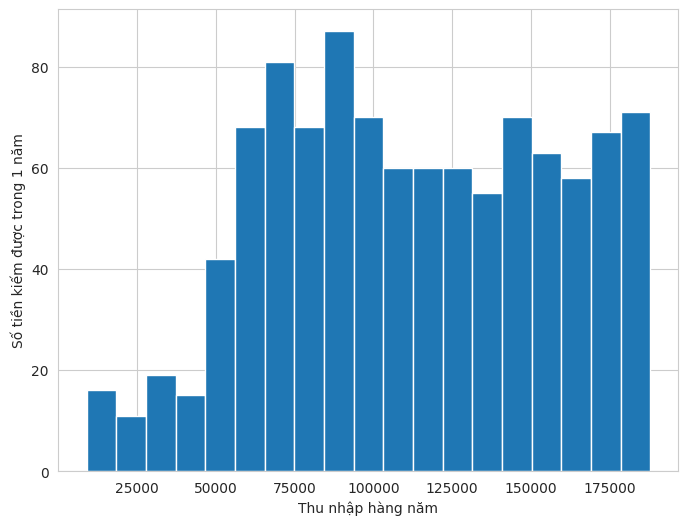

In [ ]:
maxAnnualIncome = data['AnnualIncome'].max()
minAnnualIncome = data['AnnualIncome'].min()
plt.xlabel('Thu nhập hàng năm')
plt.ylabel('Số tiền kiếm được trong 1 năm')
plt.hist(data['AnnualIncome'], bins=19, range=(minAnnualIncome, maxAnnualIncome))
plt.show()

- Trục x : Số tiền thu nhập hàng năm ($)
- Trục y : Số lượng người theo từng thu nhập (Người)

**Nhận xét**
- Số lượng thu nhập  từ $75989 - $94987 có nhiều người kiếm được nhất trong hàng năm




**Score (Điểm thành viên)**

In [ ]:
print(data['Score'].value_counts())

42    22
49    22
55    18
87    17
73    17
      ..
63     5
15     5
67     5
35     5
8      4
Name: Score, Length: 97, dtype: int64


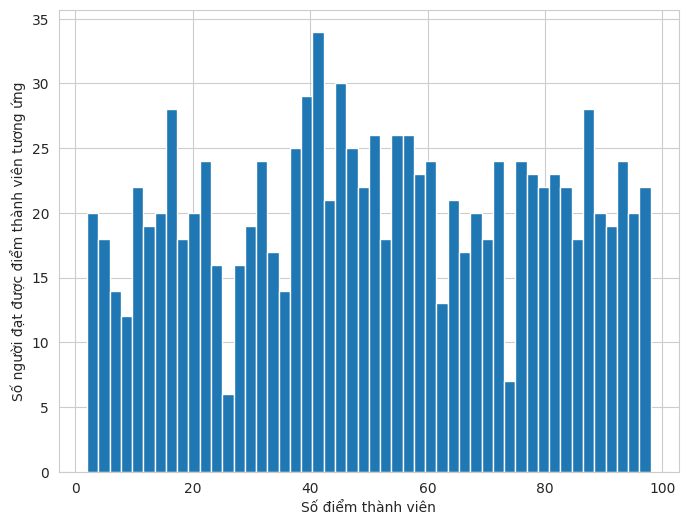

In [ ]:
maxScore = data['Score'].max()
minScore = data['Score'].min()
plt.xlabel('Số điểm thành viên')
plt.ylabel('Số người đạt được điểm thành viên tương ứng')
plt.hist(data['Score'], bins=50, range=(minScore, maxScore))
plt.show()

- Trục x : Số điểm thành viên (Điểm)
- Trục y: Số người người đạt được điểm thành viên tương ứng (Người)

**Nhận xét:**
- Số người có số điểm thành viên đông nhất là 40-50 điểm

**Profession (Nghiệp vụ việc làm)**

In [ ]:
#Tần suất xuất hiện của các thuộc tính
print(data['Profession'].value_counts())

Artist           336
Healthcare       184
Entertainment    120
Engineer          92
Executive         87
Doctor            78
Lawyer            65
Marketing         47
Homemaker         32
Name: Profession, dtype: int64


Artist           32.3
Healthcare       17.7
Entertainment    11.5
Engineer          8.8
Executive         8.4
Doctor            7.5
Lawyer            6.2
Marketing         4.5
Homemaker         3.1
Name: Profession, dtype: float64


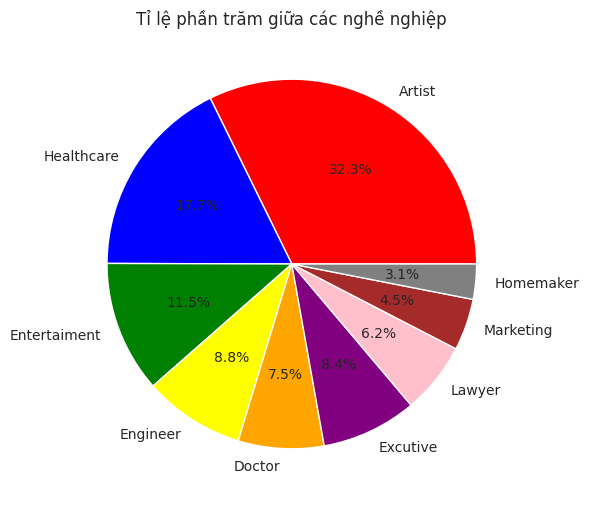

In [ ]:
# Tính tỉ lệ phần trăm của từng nghề nghiệp
occupation_percentage = data['Profession'].value_counts(normalize=True) * 100

# In ra tỉ lệ phần trăm của từng nghề nghiệp và làm tròn đến 0.1
print(occupation_percentage.round(1))

# Đếm số lượng giá trị unique của mỗi nhóm
value_counts = data['Gender'].value_counts()

# Tổng số nghề nghiệp có trong cột Profession
total_rows = len(data)

# Tính tỉ lệ phần trăm giá trị 'Artist' trong cột 'Profession'
total_Artist = data[data['Profession'] == 'Artist'].count()[0]
percentage_Artist = (total_Artist / total_rows) * 100

# Tính tỉ lệ phần trăm giá trị 'Healthcare' trong cột 'Profession'
total_Healthcare = data[data['Profession'] == 'Healthcare'].count()[0]
percentage_Healthcare = (total_Healthcare / total_rows) * 100

# Tính tỉ lệ phần trăm giá trị 'Entertainment' trong cột 'Profession'
total_Entertainment = data[data['Profession'] == 'Entertainment'].count()[0]
percentage_Entertainment = (total_Entertainment / total_rows) * 100

# Tính tỉ lệ phần trăm giá trị 'Engineer' trong cột 'Profession'
total_Engineer = data[data['Profession'] == 'Engineer'].count()[0]
percentage_Engineer = (total_Engineer / total_rows) * 100

# Tính tỉ lệ phần trăm giá trị 'Doctor' trong cột 'Profession'
total_Doctor = data[data['Profession'] == 'Doctor'].count()[0]
percentage_Doctor = (total_Doctor / total_rows) * 100

# Tính tỉ lệ phần trăm giá trị 'Executive' trong cột 'Profession'
total_Executive = data[data['Profession'] == 'Executive'].count()[0]
percentage_Executive = (total_Executive / total_rows) * 100

# Tính tỉ lệ phần trăm giá trị 'Lawyer' trong cột 'Profession'
total_Lawyer = data[data['Profession'] == 'Lawyer'].count()[0]
percentage_Lawyer = (total_Lawyer / total_rows) * 100

# Tính tỉ lệ phần trăm giá trị 'Marketing' trong cột 'Profession'
total_Marketing = data[data['Profession'] == 'Marketing'].count()[0]
percentage_Marketing = (total_Marketing / total_rows) * 100

# Tính tỉ lệ phần trăm giá trị 'Homemaker' trong cột 'Profession'
total_Homemaker = data[data['Profession'] == 'Homemaker'].count()[0]
percentage_Homemaker = (total_Homemaker / total_rows) * 100

# Dữ liệu tỉ lệ phần trăm giữa các nghề nghiệp
profession_percentage = [percentage_Artist, percentage_Healthcare, percentage_Entertainment, percentage_Engineer, percentage_Doctor, 
                         percentage_Executive, percentage_Lawyer, percentage_Marketing, percentage_Homemaker]

# Tên nhãn cho biểu đồ
labels = ['Artist', 'Healthcare', 'Entertaiment', 'Engineer', 'Doctor', 'Excutive', 'Lawyer', 'Marketing', 'Homemaker']

# Màu sắc cho các miền trong biểu đồ
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray']

# Vẽ biểu đồ đồ họa tròn
plt.pie(profession_percentage, labels=labels, colors=colors, autopct='%1.1f%%')

# Đặt tiêu đề cho biểu đồ
plt.title("Tỉ lệ phần trăm giữa các nghề nghiệp")

# Hiển thị biểu đồ
plt.show()

**Nhận xét:**
- Số chuyên môn nghiệp vụ nhiều người làm nhất là Artist
- Số chuyên môn nghiệp vụ có ít người làm nhất là Homemaker

**Work Experience (Kinh nghiệm làm việc)**

In [ ]:
print(data['WorkExperience'].value_counts())

1     305
9     109
8     102
7      90
4      85
6      84
5      81
10     57
2      44
3      40
13     12
14     12
11     10
12     10
Name: WorkExperience, dtype: int64


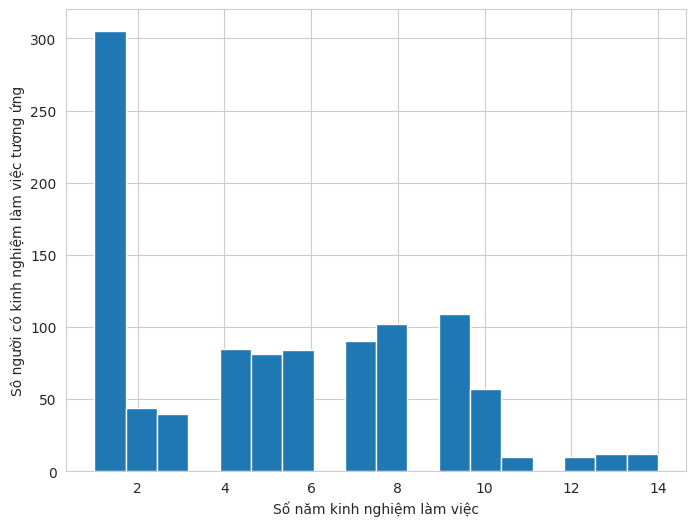

In [ ]:
maxWorkExperience = data['WorkExperience'].max()
minWorkExperience = data['WorkExperience'].min()
plt.xlabel('Số năm kinh nghiệm làm việc')
plt.ylabel('Sô người có kinh nghiệm làm việc tương ứng')
plt.hist(data['WorkExperience'], bins=18, range=(minWorkExperience, maxWorkExperience))
plt.show()

- Trục x : Số năm kinh nghiệm làm việc (năm)
- Trục y : Số người có năm kinh nghiệm làm việc tương ứng (Người)

**Nhận xét:**
- Số người có kinh nghiệm làm việc nhiều nhất là 0-2 năm

**Family Size (Số thành viên trong gia đình)**

In [ ]:
print(data['FamilySize'].value_counts())

2    252
3    228
4    204
5    183
6    174
Name: FamilySize, dtype: int64


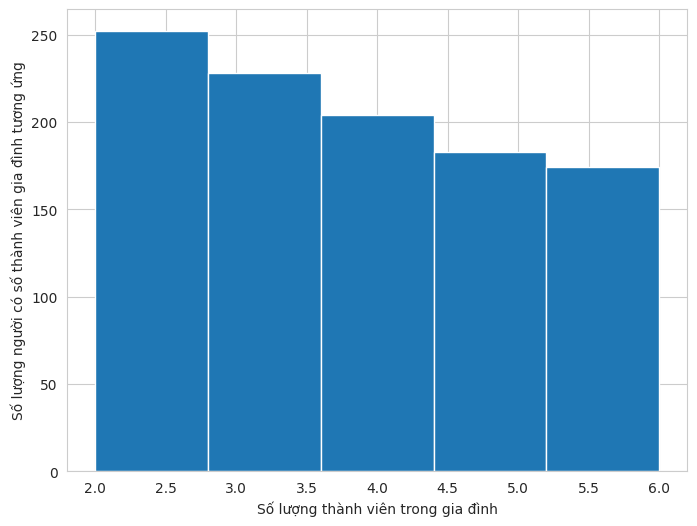

In [ ]:
maxFamilySize = data['FamilySize'].max()
minFamilySize = data['FamilySize'].min()
plt.xlabel('Số lượng thành viên trong gia đình')
plt.ylabel('Số lượng người có số thành viên gia đình tương ứng')
plt.hist(data['FamilySize'], bins=5, range=(minFamilySize, maxFamilySize))
plt.show()

- Trục x : Số lượng thành viên gia đình (Người)
- Trục y : Số người tương ưng (Người)

**Nhận xét:**
- Số người có số thành viên từ 2-3 người là đông nhất

**2.2.3.** Phân tích đa biến

**Tìm kiếm các mối quan hệ giữa các biến trong dữ liệu bằng cách sử dụng heatmap.**

In [ ]:
import seaborn as sns
data.corr()

<ipython-input-45-28f4727c3154>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,AnnualIncome,Score,WorkExperience,FamilySize
Age,1.000000,0.021018,-0.032249,0.024920,0.069471
AnnualIncome,0.021018,1.000000,0.032408,0.112951,0.099637
Score,-0.032249,0.032408,1.000000,-0.033564,-0.013667
WorkExperience,0.024920,0.112951,-0.033564,1.000000,0.035707
FamilySize,0.069471,0.099637,-0.013667,0.035707,1.000000


<ipython-input-46-8785dfed1c17>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='coolwarm',annot=True, linecolor='white',linewidths=1)


<Axes: >

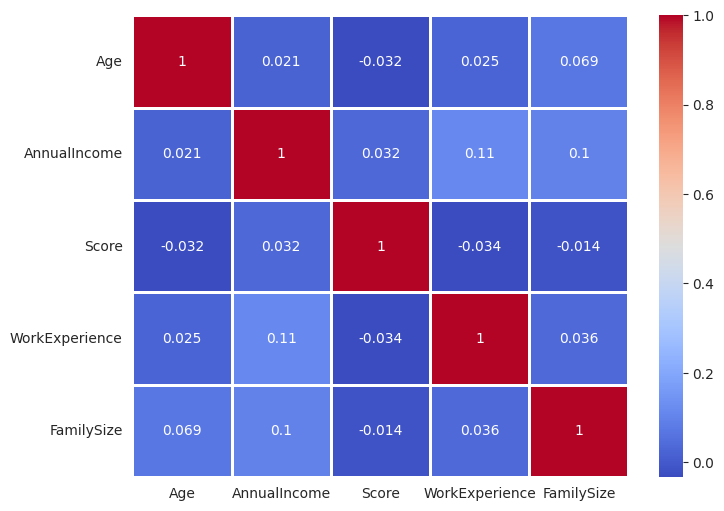

In [ ]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True, linecolor='white',linewidths=1)

Hàm corr trả về độ tương quan giữa các cột có mối liên hệ với nhau:
*   Hệ số tương quan có giá trị âm cho thấy hai biến có mối quan hệ nghịch 
biến hoặc tương quan âm (nghịch biến tuyệt đối khi giá trị bằng -1)
*   Hệ số tương quan có giá trị dương cho thấy mối quan hệ đồng biến hoặc tương quan dương (đồng biến tuyệt đối khi giá trị bằng 1)
*   Tương quan bằng 0 cho hai biến độc lập với nhau. Thông thường độ tương quan để sử dụng nằm trong khoảng 0,8 trở lên

**Nhận xét:**
- Các cặp biến có có hệ số tương quan bằng 1 nên có mối quan hệ đồng biến tuyệt đối như: Age và Age, Annual Income và Annual Income, Score và Score, Work Experience và Work Experience, Family Size và Family Size
- Các cặp biến có hệ số tương quan âm nên có mối quan hệ nghịch biến hoặc tương quan âm như: Score và Age, Score và Work Experience, Work Experience và Score.
- Các cặp biến còn lại có hệ số tương quan dương nên đều có mối quan hệ đồng biến hoặc tương quan dương

#Project cá nhân

**Mỗi cá nhân đặt ra ít nhất 2 câu hỏi về dữ liệu.**

---

Bài toán phân loại
- Những yếu tố nào xác định khách hàng tiềm năng gắn bó lâu dài với cửa hàng

**Thuật toán phân loại**

#   Decision Tree

Thêm một cột "ResultA"

Xác định khách hàng tiềm năng gắn bó lâu dài với cửa hàng

In [ ]:
# Thêm cột mới 'ResultA' dựa trên điều kiện của cột 'AnnualIncome' > 150000 và 'WorkExperience' > 10 và Score > 70
data['ResultA1'] = data.apply(lambda row: 'Yes' if row['WorkExperience'] > 10 and row['AnnualIncome'] > 150000 and row['Score'] > 70  else 'No', axis=1)
data

,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize,ResultA1
0,Male,19,15000,39,Healthcare,1,4,No
1,Male,21,35000,81,Engineer,3,3,No
4,Female,31,38000,40,Entertainment,2,6,No
6,Female,35,31000,6,Healthcare,1,3,No
7,Female,23,84000,94,Healthcare,1,3,No
...,...,...,...,...,...,...,...,...
1971,Male,94,181183,24,Marketing,9,3,No
1973,Female,19,54121,89,Engineer,6,3,No
1976,Male,87,90961,14,Healthcare,9,2,No
1977,Male,77,182109,4,Executive,7,2,No


In [ ]:
# Tạo một biến "inputs" loại trừ cách cột trong biến d_drop
d_drop = ['Age', 'ResultA1', 'Gender', 'FamilySize', 'Profession']
inputs = data.drop(d_drop, axis='columns')

In [ ]:
# Đặt bảng "ResultA1" là biến target mục tiêu của câu hỏi này
target = data['ResultA1']

In [ ]:
# Kiểm tra các giá trị có trong biến inputs
inputs

,AnnualIncome,Score,WorkExperience
0,15000,39,1
1,35000,81,3
4,38000,40,2
6,31000,6,1
7,84000,94,1
...,...,...,...
1971,181183,24,9
1973,54121,89,6
1976,90961,14,9
1977,182109,4,7


In [ ]:
# Đồng thời lúc đó chúng ta cũng kiểm tra các giá trị có trong cột target
target

0       No
1       No
4       No
6       No
7       No
        ..
1971    No
1973    No
1976    No
1977    No
1978    No
Name: ResultA1, Length: 1041, dtype: object

In [ ]:
# Khởi tạo các đối tượng LabelEncoder cho các cột AnnualIncome, Score, và WorkExperience
le_AnnualIncome = LabelEncoder()
le_Score = LabelEncoder()
le_WorkExperience = LabelEncoder()

Biến cách đoạn mã dữ dữ liệu từ dạng chữ thành dạng số

In [ ]:
# Biến cách đoạn mã dữ dữ liệu từ dạng chữ thành dạng số
inputs['AnnualIncome_n'] = le_AnnualIncome.fit_transform(inputs['AnnualIncome'])
inputs['Score_n'] = le_Score.fit_transform(inputs['Score'])
inputs['WorkExperience_n'] = le_WorkExperience.fit_transform(inputs['WorkExperience'])

In [ ]:
# Kiểm tra biến inputs sau khi chuyển các dạng dữ liệu sang kiểu số
inputs

,AnnualIncome,Score,WorkExperience,AnnualIncome_n,Score_n,WorkExperience_n
0,15000,39,1,5,37,0
1,35000,81,3,19,79,2
4,38000,40,2,22,38,1
6,31000,6,1,15,4,0
7,84000,94,1,254,92,0
...,...,...,...,...,...,...
1971,181183,24,9,900,22,8
1973,54121,89,6,56,87,5
1976,90961,14,9,306,12,8
1977,182109,4,7,907,2,6


In [ ]:
# Tiến hành xóa các dữ liệu không cần thiết như 'Score', 'WorkExperience', 'AnnualIncome' và tạo một biến mới là 'inputsn'
d_dropn = ['Score', 'WorkExperience', 'AnnualIncome']
inputsn = inputs.drop(d_dropn, axis='columns')

In [ ]:
#Kiểm tra lại biến inputsn
inputsn

,AnnualIncome_n,Score_n,WorkExperience_n
0,5,37,0
1,19,79,2
4,22,38,1
6,15,4,0
7,254,92,0
...,...,...,...
1971,900,22,8
1973,56,87,5
1976,306,12,8
1977,907,2,6


In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
# Huấn luyện mô hình Decision Tree Classifier
model.fit(inputsn, target)
model.feature_names = inputsn.columns.tolist()

In [ ]:
# Đánh giá độ chính xác của mô hình trên tập dữ liệu kiểm tra
accuracy = model.score(inputsn, target)
print("Độ chính xác trên tập dữ liệu kiểm tra:", accuracy)

Độ chính xác trên tập dữ liệu kiểm tra: 1.0


**Tiến hành dự đoán**

- Tiến hành dự đoán có liệu khách hàng có mức thu nhập hàng năm là 166107, có số điểm tích lũy là 98 và có 13 năm kinh nghiệm làm việc có phải khách hàng tiền năng hay không

In [ ]:
# Dự đoán khách hàng tiềm năng
predict = model.predict([[789, 96, 12]])
print("Khách hàng tiềm năng: "+ predict)

['Khách hàng tiềm năng: Yes']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


- Tiến hành dự đoán có liệu khách hàng có mức thu nhập hàng năm là 159006, có số điểm tích lũy là 26 và có 8 năm kinh nghiệm làm việc có phải khách hàng tiền năng hay không

In [ ]:
# Dự đoán khách hàng tiềm năng
predict = model.predict([[753, 24, 7]])
print("Khách hàng tiềm năng: "+ predict)

['Khách hàng tiềm năng: No']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Xóa cột 'ResultA1' trong DataFrame
data = data.drop('ResultA1', axis=1)
data

,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
4,Female,31,38000,40,Entertainment,2,6
6,Female,35,31000,6,Healthcare,1,3
7,Female,23,84000,94,Healthcare,1,3
...,...,...,...,...,...,...,...
1971,Male,94,181183,24,Marketing,9,3
1973,Female,19,54121,89,Engineer,6,3
1976,Male,87,90961,14,Healthcare,9,2
1977,Male,77,182109,4,Executive,7,2


- Những yếu tố nào giúp xác định khách hàng có mức sống cao

In [ ]:
# Thêm cột mới 'ResultA2' dựa trên điều kiện của cột 'AnnualIncome' > 150000 và 'Score' > 70, 'Age' > 20 và FamilySize < 3
data['ResultA2'] = data.apply(lambda row: 'Yes' if row['Age'] > 20 and row['AnnualIncome'] > 150000 and row['Score'] > 70 and row['FamilySize'] <= 3 else 'No', axis=1)
data

,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize,ResultA2
0,Male,19,15000,39,Healthcare,1,4,No
1,Male,21,35000,81,Engineer,3,3,No
4,Female,31,38000,40,Entertainment,2,6,No
6,Female,35,31000,6,Healthcare,1,3,No
7,Female,23,84000,94,Healthcare,1,3,No
...,...,...,...,...,...,...,...,...
1971,Male,94,181183,24,Marketing,9,3,No
1973,Female,19,54121,89,Engineer,6,3,No
1976,Male,87,90961,14,Healthcare,9,2,No
1977,Male,77,182109,4,Executive,7,2,No


In [ ]:
# Tạo một biến "inputs" loại trừ cách cột trong biến d_drop
b_drop = ['ResultA2', 'Gender', 'Profession', 'WorkExperience']
inputs = data.drop(b_drop, axis='columns')

In [ ]:
# Đặt biến target với dữ liệu của cột “ResultA2” vừa tạo
target = data['ResultA2']

In [ ]:
# Kiểm tra các giá trị có trong biến inputs
inputs

,Age,AnnualIncome,Score,FamilySize
0,19,15000,39,4
1,21,35000,81,3
4,31,38000,40,6
6,35,31000,6,3
7,23,84000,94,3
...,...,...,...,...
1971,94,181183,24,3
1973,19,54121,89,3
1976,87,90961,14,2
1977,77,182109,4,2


In [ ]:
# Đồng thời lúc đó chúng ta cũng kiểm tra các giá trị có trong cột target
target

0       No
1       No
4       No
6       No
7       No
        ..
1971    No
1973    No
1976    No
1977    No
1978    No
Name: ResultA2, Length: 1041, dtype: object

In [ ]:
# Biến cách đoạn mã dữ dữ liệu từ dạng chữ thành dạng số
le_Age = LabelEncoder()
le_AnnualIncome = LabelEncoder()
le_Score = LabelEncoder()
le_FamilySize = LabelEncoder()

In [ ]:
# Biến cách đoạn mã dữ dữ liệu từ dạng chữ thành dạng số
inputs['Age_n'] = le_Age.fit_transform(inputs['Age'])
inputs['AnnualIncome_n'] = le_AnnualIncome.fit_transform(inputs['AnnualIncome'])
inputs['Score_n'] = le_Score.fit_transform(inputs['Score'])
inputs['FamilySize_n'] = le_FamilySize.fit_transform(inputs['FamilySize'])

In [ ]:
# Kiểm tra dòng dữ liệu trong biến inputs
inputs

,Age,AnnualIncome,Score,FamilySize,Age_n,AnnualIncome_n,Score_n,FamilySize_n
0,19,15000,39,4,18,5,37,2
1,21,35000,81,3,20,19,79,1
4,31,38000,40,6,30,22,38,4
6,35,31000,6,3,34,15,4,1
7,23,84000,94,3,22,254,92,1
...,...,...,...,...,...,...,...,...
1971,94,181183,24,3,93,900,22,1
1973,19,54121,89,3,18,56,87,1
1976,87,90961,14,2,86,306,12,0
1977,77,182109,4,2,76,907,2,0


In [ ]:
# Tiến hành xóa các dữ liệu không cần thiết như 'Score', 'Age', 'AnnualIncome', 'FamilySize' và tạo một biến mới là 'inputsn'
d_dropn = ['Age', 'Score', 'FamilySize', 'AnnualIncome']
inputsn = inputs.drop(d_dropn, axis='columns')

In [ ]:
#Kiểm tra lại biến inputsn
inputsn

,Age_n,AnnualIncome_n,Score_n,FamilySize_n
0,18,5,37,2
1,20,19,79,1
4,30,22,38,4
6,34,15,4,1
7,22,254,92,1
...,...,...,...,...
1971,93,900,22,1
1973,18,56,87,1
1976,86,306,12,0
1977,76,907,2,0


In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
# Huấn luyện mô hình Decision Tree Classifier
model.fit(inputsn, target)
model.feature_names = inputsn.columns.tolist()

In [ ]:
# Đánh giá độ chính xác của mô hình trên tập dữ liệu kiểm tra
accuracy = model.score(inputsn, target)
print("Độ chính xác trên tập dữ liệu kiểm tra:", accuracy)

Độ chính xác trên tập dữ liệu kiểm tra: 1.0


**Tiến hành dự đoán**

Tiến hành dự đoán những khách hàng có mức sống cao với điều kiện 'Age' = 22 , 'AnnualIncome' = 162598, 'Score' = 84 và 'FamilySize' = 3

In [ ]:
# Dự đoán khách hàng có mức sống cao
predict = model.predict([[21, 766, 82, 1]])
print("Khách hàng có mức sống cao: "+ predict)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


['Khách hàng có mức sống cao: Yes']


Tiến hành dự đoán những khách hàng có mức sống cao với điều kiện 'Age' = 93 , 'AnnualIncome' = 151468, 'Score' = 41 và 'FamilySize' = 5

In [ ]:
# Dự đoán khách hàng có mức sống cao
predict = model.predict([[39, 699, 39, 3]])
print("Khách hàng có mức sống cao: "+ predict)

['Khách hàng có mức sống cao: No']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Tiến hành dự đoán những khách hàng có mức sống cao với điều kiện 'Age' = 22 , 'AnnualIncome' = 162598, 'Score' = 84 và 'FamilySize' = 3

In [ ]:
# Xóa cột 'ResultA2' trong DataFrame
data = data.drop('ResultA2', axis=1)
data.head()

,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
4,Female,31,38000,40,Entertainment,2,6
6,Female,35,31000,6,Healthcare,1,3
7,Female,23,84000,94,Healthcare,1,3


#Logistic Regression
- Những yếu tố nào giúp xác định khách hàng có mức sống cao

In [ ]:
# Thêm cột mới 'ResultB1' dựa trên điều kiện của cột 'AnnualIncome' > 150000 và 'Score' > 70
data['ResultB1'] = data.apply( lambda row: 'Yes' if row['AnnualIncome'] > 150000 and row['Score'] > 70 else 'No', axis=1)
data

,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize,ResultB1
0,Male,19,15000,39,Healthcare,1,4,No
1,Male,21,35000,81,Engineer,3,3,No
4,Female,31,38000,40,Entertainment,2,6,No
6,Female,35,31000,6,Healthcare,1,3,No
7,Female,23,84000,94,Healthcare,1,3,No
...,...,...,...,...,...,...,...,...
1971,Male,94,181183,24,Marketing,9,3,No
1973,Female,19,54121,89,Engineer,6,3,No
1976,Male,87,90961,14,Healthcare,9,2,No
1977,Male,77,182109,4,Executive,7,2,No


In [ ]:
# Chia dữ liệu thành features và target
X = data[['AnnualIncome','Score']]
y = data['ResultB2']

In [ ]:
# Tạo mô hình Logistic Regression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
#Male	21	187761	87	Healthcare	2	3	Yes
# Dự đoán xác suất khách hàng mua sản phẩm với giá khuyến mãi có thu nhập hàng năm là 187761 và có số điểm là 87
predicted_prob = model.predict_proba([[187761, 87]])[:, 1]
print('Xác suất khách hàng mua sản phẩm:', predicted_prob)

Xác suất khách hàng mua sản phẩm: [0.50991541]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Tiền xử lý dữ liệu
X = data[['AnnualIncome', 'Score', 'FamilySize']].values # Chuyển đổi dữ liệu thành mảng 1 chiều
y = data['ResultB1'].values # Chuyển đổi dữ liệu thành mảng 1 chiều

In [ ]:
from sklearn.model_selection import train_test_split
# Phân chia dữ liệu huấn luyện và dữ liệu kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Logistic Regression
logr = LogisticRegression()
logr.fit(X_train, y_train)

# Đánh giá hiệu suất của mô hình
accuracy = logr.score(X_test, y_test)
print("Độ chính xác của mô hình: {:.2f}".format(accuracy))

# Dự đoán với dữ liệu mới
new_data = [[151519, 93, 2]] # Đưa dữ liệu mới vào một mảng 2 chiều
predicted = logr.predict(new_data)
print("Kết quả dự đoán: {}".format(predicted))

Độ chính xác của mô hình: 0.96
Kết quả dự đoán: ['No']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Tiến hành xử lý dữ liệu, lựa chọn đặc trưng và nhãn
X = data[['AnnualIncome', 'Score', 'FamilySize']]
y = data['ResultB1']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = logreg.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình:", accuracy)


Độ chính xác của mô hình: 0.9617224880382775


In [ ]:
# Xóa cột 'ResultB1' trong DataFrame
data = data.drop('ResultB1', axis=1)
data

,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize,ResultB2
0,Male,19,15000,39,Healthcare,1,4,no
1,Male,21,35000,81,Engineer,3,3,yes
4,Female,31,38000,40,Entertainment,2,6,no
6,Female,35,31000,6,Healthcare,1,3,yes
7,Female,23,84000,94,Healthcare,1,3,no
...,...,...,...,...,...,...,...,...
1971,Male,94,181183,24,Marketing,9,3,yes
1973,Female,19,54121,89,Engineer,6,3,no
1976,Male,87,90961,14,Healthcare,9,2,no
1977,Male,77,182109,4,Executive,7,2,no


- •	Shop sẽ kinh doanh các mặt hàng mới liệu có thể thu hút được nhiều khách hàng không

In [ ]:
# Thêm cột mới 'ResultB2' dựa trên điều kiện của cột 'WorkExperience' > 10 và 'Score' > 70 và AnnualIncome >150000
data['ResultB1'] = data.apply( lambda row: 'yes' if row['AnnualIncome'] > 150000 and row['Score'] > 80 and row['FamilySize'] <= 3 and row['Age'] > 20 and row['Gender']=='Male' else 'no', axis=1)
data

,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize,ResultB1
0,Male,19,15000,39,Healthcare,1,4,no
1,Male,21,35000,81,Engineer,3,3,no
4,Female,31,38000,40,Entertainment,2,6,no
6,Female,35,31000,6,Healthcare,1,3,no
7,Female,23,84000,94,Healthcare,1,3,no
...,...,...,...,...,...,...,...,...
1971,Male,94,181183,24,Marketing,9,3,no
1973,Female,19,54121,89,Engineer,6,3,no
1976,Male,87,90961,14,Healthcare,9,2,no
1977,Male,77,182109,4,Executive,7,2,no


In [ ]:
# Chia dữ liệu thành features và target
X = data[['Age','AnnualIncome','Score','FamilySize']]
y = data['ResultB2']

In [ ]:
# Tạo mô hình Logistic Regression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
# Dự đoán xác suất khách hàng mua sản phẩm với đọ tuổi là 87, có thu nhận hàng năm là 170333, số điểm thành viên là 96 và gia đính có 2 thành viên
predicted_prob = model.predict_proba([[87, 170333, 96, 2]])[:, 1]
print('Xác suất khách hàng mua sản phẩm:', predicted_prob)
#Female	87	170333	96	Entertainment	4	2	yes

Xác suất khách hàng mua sản phẩm: [0.52009147]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Tiền xử lý dữ liệu
X = data[['WorkExperience', 'Score', 'AnnualIncome']].values # Chuyển đổi dữ liệu thành mảng 1 chiều
y = data['ResultB2'].values # Chuyển đổi dữ liệu thành mảng 1 chiều

In [ ]:
# Phân chia dữ liệu huấn luyện và dữ liệu kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Logistic Regression
logr = LogisticRegression()
logr.fit(X_train, y_train)

# Đánh giá hiệu suất của mô hình
accuracy = logr.score(X_test, y_test)
print("Độ chính xác của mô hình: {:.2f}".format(accuracy))

# Dự đoán với dữ liệu mới
new_data = [[182352, 73, 4]] # Đưa dữ liệu mới vào một mảng 2 chiều
predicted = logr.predict(new_data)
print("Kết quả dự đoán: {}".format(predicted))

Độ chính xác của mô hình: 1.00
Kết quả dự đoán: ['0']


In [ ]:

# Chia dữ liệu thành features và target
X = data[['Age','AnnualIncome','Score', 'FamilySize' ]]
y = data['ResultB2']

# Tạo mô hình Logistic Regression
model = LogisticRegression()
model.fit(X, y)

# Dự đoán xác suất khách hàng mua sản phẩm với tuổi là 35 và thu nhập là 90k
predicted_prob = model.predict_proba([[78, 163514, 89, 2]])[:, 1]
print('Xác suất khách hàng mua sản phẩm:', predicted_prob)


Xác suất khách hàng mua sản phẩm: [0.0588599]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Xóa cột 'ResultB2' trong DataFrame
data = data.drop('ResultB2', axis=1)
data.head()

,Gender,Age,AnnualIncome,Score,Profession,WorkExperience,FamilySize,ResultB1
0,Male,19,15000,39,Healthcare,1,4,no
1,Male,21,35000,81,Engineer,3,3,no
4,Female,31,38000,40,Entertainment,2,6,no
6,Female,35,31000,6,Healthcare,1,3,no
7,Female,23,84000,94,Healthcare,1,3,no


# **3. Kết luận**

Vì data không có dữ liệu chuỗi thời gian nên không thể thể thực hiện phân tích chuỗi thời gian

---


Sau khi tiến hành khai phá tập dữ liệu Shop Customer Data Set ta có kết 
luận như sau:

---

- Số lượng người khách hàng thường xuyên mua đồ có độ tuổi là từ 29-40, những người mua hàng có đa phần giới tính là nữ, có thu nhập từ $76000 - $95000.
- Họ thường chi tiêu cho cửa hàng một số điểm từ 40 - 50 và có từ 2-3 thành viên trong gia đình. 